In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import train and test data

In [231]:
#Read train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [230]:
print(train.info()
     ,train.describe())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explorative Analysis

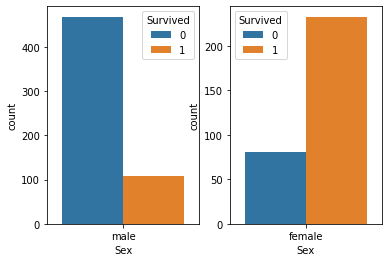

In [7]:
#Women VS Men
male_data = train[train['Sex']=='male']
female_data = train[train['Sex']=='female']

fig, ax =plt.subplots(1,2)

sns.countplot(x='Sex',hue='Survived',data=male_data,ax=ax[0])
sns.countplot(x='Sex',hue='Survived',data=female_data,ax=ax[1])

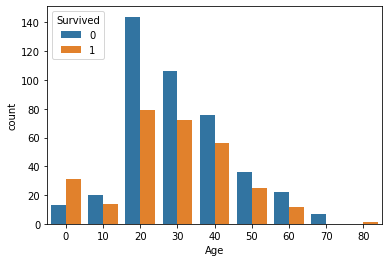

In [8]:
#Age groups

def custom_round(x, base=10):
    return int(base * round(float(x)/base))

sns.countplot(train['Age'].dropna().apply(lambda x: custom_round(x, base=10)),hue=train['Survived'])

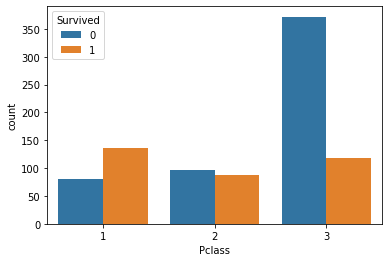

In [9]:
#Classes
sns.countplot(train['Pclass'],hue=train['Survived'])

Text(0.5, 1.0, 'Women')

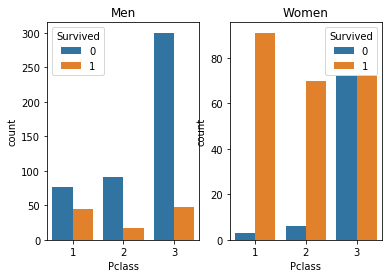

In [10]:
#Women VS Men
fig, ax =plt.subplots(1,2)

sns.countplot(x='Pclass',hue='Survived',data=male_data,ax=ax[0]).set_title("Men")
sns.countplot(x='Pclass',hue='Survived',data=female_data,ax=ax[1]).set_title("Women")

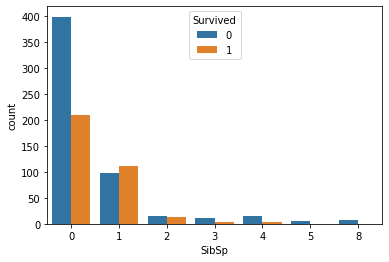

In [11]:
#Siblings/Spouse
sns.countplot(x='SibSp',hue='Survived',data=train)

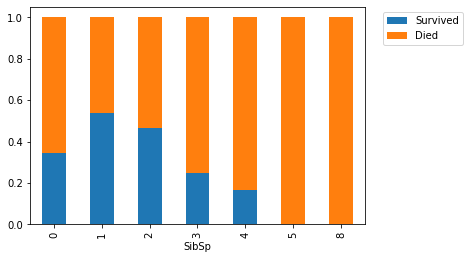

In [12]:
#Create Died column
train['Died'] = 1 - train['Survived']

#Relative Sibling/Spouse
train.groupby('SibSp').agg('mean')[['Survived', 'Died']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

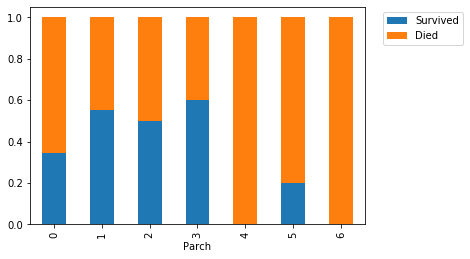

In [13]:
#Relative Parch
train.groupby('Parch').agg('mean')[['Survived', 'Died']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

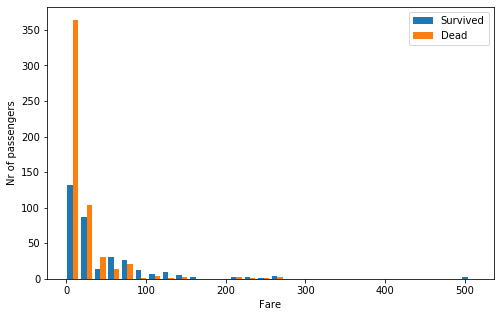

In [14]:
#Fare
plt.figure(figsize=[8,5])
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], bins = 30, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Nr of passengers')
plt.legend()
plt.show()

# Clean Missing Age Values

In [232]:
#Create means for different Pclass to handle missing values
mean_age_1 = train[train['Pclass']==1]['Age'].mean()
mean_age_2 = train[train['Pclass']==2]['Age'].mean()
mean_age_3 = train[train['Pclass']==3]['Age'].mean()

#If age is missing asign a mean
def impute_age(x):
    
    if pd.isnull(x[0]):
    
        if x[1]==1:
            return mean_age_1

        if x[1]==2:
            return mean_age_2

        else:
            return mean_age_3
        
    else: 
        return x[0]

#Replace missing age values in train
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

#Replace missing age values in test
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
    

## Clean Fare

In [233]:
#Check for null values
test[test['Fare'].isnull()]

#Calculate avg fare for Pclass = 3
mean_fare = train[train['Pclass']==3]['Fare'].mean()

#Fill in avg fare for missing fares
test['Fare'].fillna(mean_fare,inplace=True)

## Create Title


In [234]:
#Extract title from name
def get_title(string):
    
    x = string.split(',')
    title_split = x[1].split('.')
    return title_split[0]

#Create new column
train['Title'] = train['Name'].apply(get_title)
test['Title'] = test['Name'].apply(get_title)

#Remove whitespace
train['Title'] = train['Title'].apply(lambda x:x.lstrip())
test['Title'] = test['Title'].apply(lambda x:x.lstrip())

In [236]:
 #replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir','Dona']:
        return 'Noble'
    elif title in ['Countess', 'Mme','the Countess']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms','Lady']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

#Apply replace_titles to test and train
train['Title']=train.apply(replace_titles, axis=1)
test['Title']=test.apply(replace_titles, axis=1)


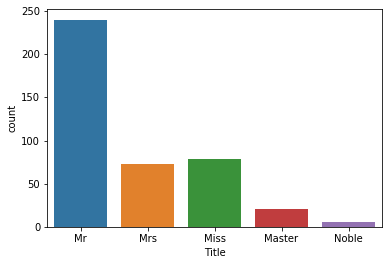

In [249]:
#Countplot of new titles
sns.countplot(test['Title'])

# Setting features and creating dummy data

In [254]:
#Decide on features for input to model
features = ['Age','Sex','Pclass','Parch','SibSp','Fare','Title','Embarked']
train_X = train[features]
train_y = train['Survived']
test_X = test[features]

In [266]:
train_X.head()

,Age,Pclass,Parch,SibSp,Fare,male,Miss,Mr,Mrs,Noble,Q,S,Q,S
0,22.0,3,0,1,7.2500,1,0,1,0,0,0,1,0,1
1,38.0,1,0,1,71.2833,0,0,0,1,0,0,0,0,0
2,26.0,3,0,0,7.9250,0,1,0,0,0,0,1,0,1
3,35.0,1,0,1,53.1000,0,0,0,1,0,0,1,0,1
4,35.0,3,0,0,8.0500,1,0,1,0,0,0,1,0,1


In [256]:
#Create dummy variables for Sex column
sex_dum = pd.get_dummies(train_X['Sex'],drop_first=True)
train_X.drop('Sex',axis=1,inplace=True)
train_X = pd.concat([train_X,sex_dum],axis=1)


sex_dum = pd.get_dummies(test['Sex'],drop_first=True)
test_X.drop('Sex',axis=1,inplace=True)
test_X = pd.concat([test_X,sex_dum],axis=1)

/Users/alexis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [257]:
#Create dummy variables for Title column
title_dum = pd.get_dummies(train_X['Title'],drop_first=True)
train_X.drop('Title',axis=1,inplace=True)
train_X = pd.concat([train_X,title_dum],axis=1)


title_dum = pd.get_dummies(test_X['Title'],drop_first=True)
test_X.drop('Title',axis=1,inplace=True)
test_X = pd.concat([test_X,title_dum],axis=1)

In [265]:
#Create dummy variables for Embarked column
embark_dum = pd.get_dummies(train['Embarked'],drop_first=True)
train_X.drop('Embarked',axis=1,inplace=True)
train_X = pd.concat([train_X,embark_dum],axis=1)


embark_dum = pd.get_dummies(test_X['Embarked'],drop_first=True)
test_X.drop('Embarked',axis=1,inplace=True)
test_X = pd.concat([test_X,embark_dum],axis=1)

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [267]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [268]:
#Fit the model
rfc.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [270]:
#Create prediction for test data based on model
y_test = rfc.predict(test_X)

In [271]:
#Output submission
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_test})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
